In [57]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import holoviews as hv
from holoviews import opts




In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [67]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [84]:
# Select only the numeric columns for scaling
numeric_cols = df_market_data.select_dtypes(include=['number'])

# Store the cryptocurrency names
crypto_names = df_market_data['coin_id']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numeric data
scaled_data = scaler.fit_transform(numeric_cols)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=numeric_cols.columns)

# Concatenate the cryptocurrency names with the scaled numeric data
scaled_df_with_names = pd.concat([crypto_names, scaled_df], axis=1)

scaled_df_with_names.set_index('coin_id', inplace=True)

# Display the first few rows of the DataFrame with names and scaled data
scaled_df_with_names.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

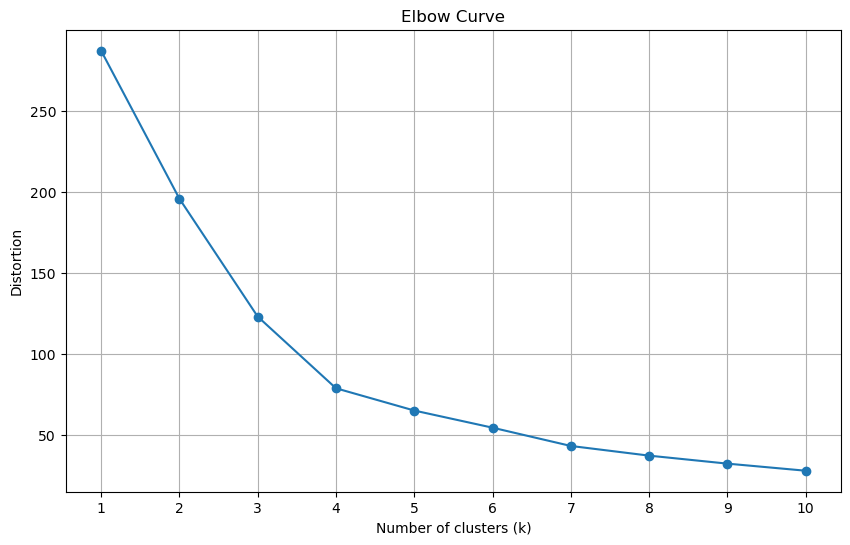

In [85]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)
distortions = []

for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit KMeans to the scaled data
    kmeans.fit(scaled_df)
    # Append the inertia (distortion) to the list
    distortions.append(kmeans.inertia_)


# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [86]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)


c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [87]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'Number of Clusters (k)': k_values, 'Inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



   Number of Clusters (k)     Inertia
0                       1  287.000000
1                       2  195.820218
2                       3  123.190482
3                       4   79.022435
4                       5   65.302379
5                       6   54.739922
6                       7   43.481606
7                       8   37.517032
8                       9   32.591891
9                      10   28.222899


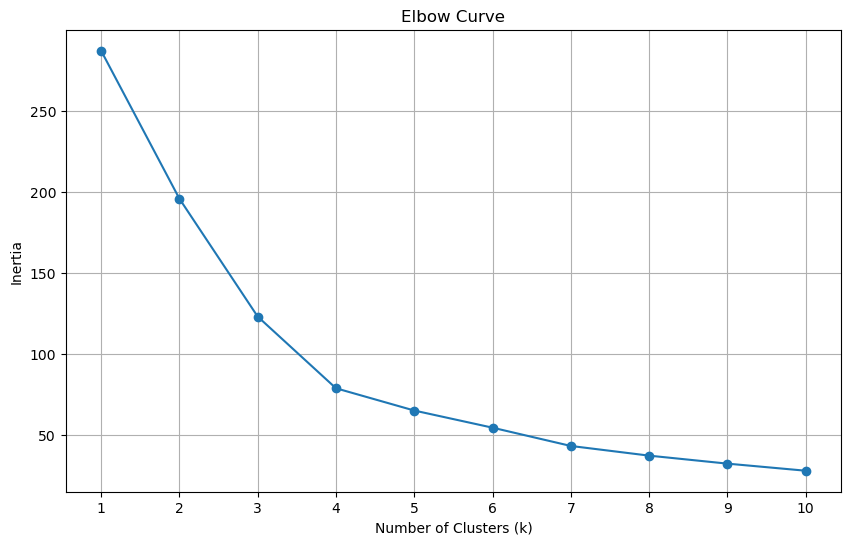

In [88]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 is the best value for K

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [89]:
# Initialize the K-Means model using the best value for k
best_k = 3 

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [90]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)
# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Print the cluster labels for the first few samples
print(cluster_labels[:5]) 

c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1]


In [96]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values
cluster_predictions



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [95]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy()
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [99]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_predictions

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [100]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="predicted_cluster",
    hover_cols=["coin_id"],
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage",
    title="Cryptocurrency Clusters")

# Show the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [101]:
# Create a PCA model instance and set `n_components=3`.

pca_model = PCA(n_components=3)

# Fit the PCA model to the scaled data
pca_model.fit(scaled_df)

# Transform the scaled data to the lower-dimensional space
pca_data = pca_model.transform(scaled_df)


In [106]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# Fit and transform the scaled data using PCA
pca_data = pca_model.fit_transform(scaled_df)

# Create a DataFrame from the PCA transformed data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Display the first five rows of the DataFrame
pca_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [107]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance for PC{i+1}: {ratio:.2f}")

# Sum up the explained variance ratios of the three principal components
total_explained_variance = sum(pca_model.explained_variance_ratio_)

# Print the total explained variance
print(f"Total Explained Variance of the Three Principal Components: {total_explained_variance:.2f}")



Explained Variance for PC1: 0.37
Explained Variance for PC2: 0.35
Explained Variance for PC3: 0.18
Total Explained Variance of the Three Principal Components: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.90

In [111]:
# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Add the cryptocurrency names column to the DataFrame
pca_df['coin_id'] = crypto_names
pca_df.set_index('coin_id', inplace= True)

# Display sample data
pca_df.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [114]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

# Print the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [119]:
# Remove the 'crypto_names' column from pca_df before fitting KMeans
#pca_df.drop(columns=['coin_id'], inplace=True)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [120]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'Number of Clusters (k)': k_values, 'Inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


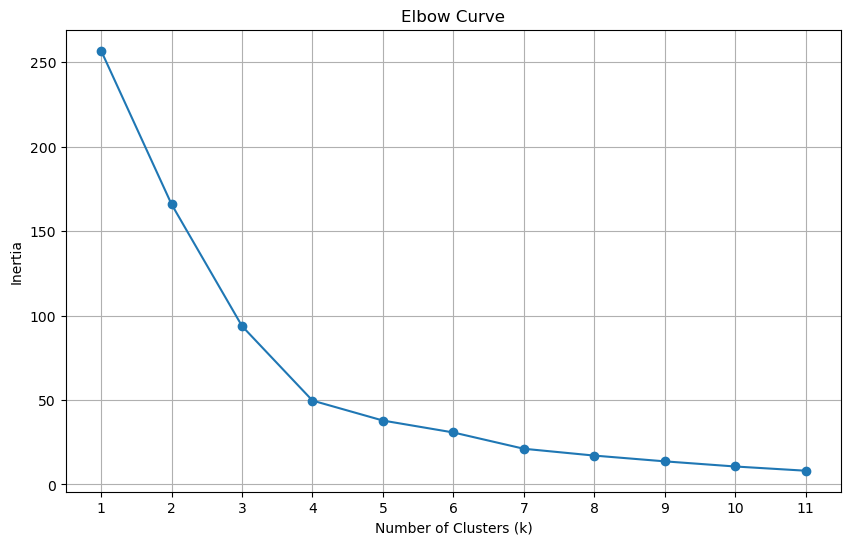

In [121]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['Number of Clusters (k)'], elbow_df['Inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [122]:
# Initialize the K-Means model using the best value for k

best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [123]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [124]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [125]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['predicted_cluster'] = predicted_clusters

# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [126]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = pca_clustered_df.hvplot.scatter(
    x= 'PC1',
    y= 'PC2',
    by= 'predicted_cluster',
    hover_cols=['cryto_names'],
    title= 'PCA Scatter Plot'
)

scatter_plot


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [127]:
# Load the elbow curve data for both original and PCA-transformed data
original_elbow_curve = elbow_df.hvplot.line(
    x='Number of Clusters (k)',
    y='Inertia',
    title='Elbow Curve for Original Data'
)

pca_elbow_curve = elbow_df.hvplot.line(
    x='Number of Clusters (k)',
    y='Inertia',
    title='Elbow Curve for PCA Transformed Data'
)

# Load the clustered data for both original and PCA-transformed data
original_clusters_plot = hv.Scatter(df_copy, 'price_change_percentage_24h', 'price_change_percentage_7d', group='Original Data Clusters')

pca_clusters_plot = hv.Scatter(pca_clustered_df, 'PC1', 'PC2', group='PCA Transformed Data Clusters')

# Create a composite plot for comparing elbow curves
elbow_curve_comparison = original_elbow_curve + pca_elbow_curve

# Create a composite plot for comparing cryptocurrency clusters
clusters_comparison = original_clusters_plot + pca_clusters_plot

# Display the composite plots
(elbow_curve_comparison + clusters_comparison).cols(2)



:Layout
   .Curve.I                         :Curve   [Number of Clusters (k)]   (Inertia)
   .Curve.II                        :Curve   [Number of Clusters (k)]   (Inertia)
   .Original_Data_Clusters.I        :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .PCA_Transformed_Data_Clusters.I :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Elbow Curve comparison: The elbow curve for the original data shows a more distinct elbow point whereas the inertia starts to decrease at a slower rate, indicating a clearer optimal number of clusters (3). In contrast, the elbow curve for the PCA-transformed data shows a smoother curve with less distinct elbow point. This suggests that the optimal number of clusters is less obvious when using fewer features.

  Cryptocurrency Clusters Comparison:
  - When clustering the original data, there are tighter clusters or clearer separation between points as the model has more features to consider. The PCA-transformed data results in overlappoing data points, indicating that some information may have been lost during the dimensionality reduction process.